# Understanding Bagging and RandomForest
    The objective of this exercise is to get familiar with ensemble of classifiers and understand how the number of classifiers/learners affect the accuracy of the classifier.
    
    Work on http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names dataset using ensembles of DecisionTrees based on Bagging.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

C:\Users\Gurpreet\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [62]:
bc = pd.read_table('wdbc.data',delimiter=',',header=None)
bc.shape

(569, 32)

In [63]:
bc.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
# check for class bias-ness
bc[1].value_counts()

B    357
M    212
Name: 1, dtype: int64

In [65]:
#first feature is ID, which can be dropped
bc_new = bc.drop(0,axis=1)

In [66]:
bc_arr = bc_new.values

In [67]:
#seperate target and features
target = bc_arr[:,0]
features = bc_arr[:,1:]

In [68]:
target[:5]

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

In [69]:
print(target.shape)
print(features.shape)

(569,)
(569, 30)


In [70]:
features[:3]

array([[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471,
        0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904,
        0.05372999999999999, 0.01587, 0.03003, 0.006193, 25.38, 17.33,
        184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869,
        0.07017000000000001, 0.1812, 0.056670000000000005, 0.5435,
        0.7339, 3.398, 74.08, 0.005225, 0.013080000000000001, 0.0186,
        0.0134, 0.013890000000000001, 0.003532, 24.99, 23.41, 158.8,
        1956.0, 0.1238, 0.1866, 0.2416, 0.18600000000000003, 0.275,
        0.08902],
       [19.69, 21.25, 130.0, 1203.0, 0.1096, 0.1599, 0.1974, 0.1279,
        0.2069, 0.059989999999999995, 0.7456, 0.7869, 4.585, 94.03,
        0.00615, 0.040060000000000005, 0.03832, 0.02058, 0.0225,
        0.004571, 23.57, 25.53, 152.5, 1709.0, 0.1444, 0.4245, 0.4504,
        0.243, 0.3613, 0.08757999999999999]], dtype=object)

In [71]:
#split features
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(features,target,test_size=0.33)


In [72]:
#create a parameter grid for random search cv
random_grid = {'n_estimators': np.linspace(1,200,20).astype(np.int32),
               'criterion':['gini','entropy'],
               'max_features': ['auto','sqrt','log2'],
               'max_depth': np.linspace(5,100,10).astype(np.int32),
               'min_samples_leaf': np.linspace(5,50,10).astype(np.int32),
               'bootstrap': [True]
}

print(random_grid)


{'n_estimators': array([  1,  11,  21,  32,  42,  53,  63,  74,  84,  95, 105, 116, 126,
       137, 147, 158, 168, 179, 189, 200]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': array([  5,  15,  26,  36,  47,  57,  68,  78,  89, 100]), 'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]), 'bootstrap': [True]}


In [73]:
#Use the random grid to search for best hyperparameters

#first initialize randomforest instance
rfc = RandomForestClassifier(random_state=10)

#search with 50 different combinations
rf_random = model_selection.RandomizedSearchCV(estimator = rfc, \
                                               param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, \
                                               random_state=10, n_jobs = -1)


In [74]:
#fit random search
rf_random.fit(xtrain,ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   31.1s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': array([  1,  11,  21,  32,  42,  53,  63,  74,  84,  95, 105, 116, 126,
       137, 147, 158, 168, 179, 189, 200]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': array([  5,  15,  26,  36,  47,  57,  68,  78,  89, 100]), 'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]), 'bootstrap': [True]},
          pre_dispatch='2*n_jobs', random_state=10, refit=True,
 

In [75]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=78, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [76]:
rf_random.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 78,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'n_estimators': 11}

<b> The RandomSearchCV returned best parameters as below:</b>

`n_estimators=11, criterion='entropy',max_depth=78,max_features='auto',min_samples_leaf=5`


#### Next: I will evaluate the performance of RandomForest using above params but changing only n_estimators/number of trees used.

In [77]:
#initialize params
criterion = 'entropy'
max_depth=78
max_features = 'auto'
min_samples_leaf=5


In [78]:
num_trees = np.linspace(1,200,15).astype(np.int32)
num_trees

array([  1,  15,  29,  43,  57,  72,  86, 100, 114, 128, 143, 157, 171,
       185, 200])

In [79]:
error = []
for trees in num_trees:
    rfc = RandomForestClassifier(n_estimators=trees,criterion=criterion,max_depth=max_depth,\
                                 max_features=max_features,min_samples_leaf=min_samples_leaf,random_state=10)
    
    accuracy,_,_ = fit_and_evaluate(xtrain,ytrain,xtest,ytest,rfc,None)
    error.append(1-accuracy)

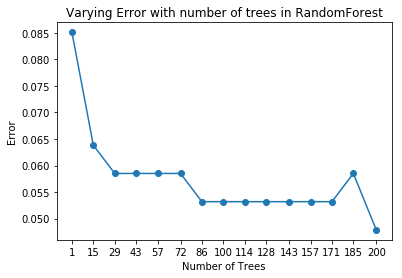

In [80]:
#plt.Figure(figsize=(12,14))
plt.plot(num_trees,error,'o-')
plt.xticks(num_trees)
plt.title('Varying Error with number of trees in RandomForest')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.show()

<b>Analysis:</b> From the above graph we can see that the error is minimum when number of trees are between 15-29. These results are inline with RandomSearchCV (where n_estimators = 11). However, the graph might be desceptive to some since it is displaying the error change from 0.03-0.08 (which is very small scale). 

<b>Is bagging an appropriate choice for the proposed ensemble for this particular data?</b>
    
    Answer: The bagging or ensemble might not be a good choice for this particular dataset. It is because we can obtain very good accuracy and low error rate with just one DecisionTreeClassifier as we can see from the above graph. Using the ensemle increases the complexity of the model but does not do well on lowering error rates by much.

Differences between Bagging and Boosting:

Answer: 

Bagging: 
-	Draw random samples from data with replacement i.e. using bootstrap.
-	Build n models that are independent of each other.
-	Build models that learn from samples of dataset provided to them. 
-	Choose a best estimator/model as a final model.

Boosting:
-	Draw random samples from data without replacement
-	Build models in collaboration with previous models i.e. new model is made to train on the errored/misclassified instances of previous model.
-	Build weak learners to learn only a specific set of instances that are hard to classify otherwise
-	Combine all the weak learners to make a strong learner model with a higher predictive power.


### Evaluate simple DecisionTree vs Ensemble of Trees on Additional Datasets

**Repeat problem for winered.data: https://archive.ics.uci.edu/ml/datasets/Wine+Quality**

In [81]:
wine = pd.read_csv('winequality-red.csv',delimiter=';')
wine.shape

(1599, 12)

In [82]:
target= wine['quality']
features = wine[wine.columns.values[:-1]]
print(target.shape)
print(features.shape)

(1599,)
(1599, 11)


In [83]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(features,target,test_size=0.33)

In [84]:
print(random_grid)

{'n_estimators': array([  1,  11,  21,  32,  42,  53,  63,  74,  84,  95, 105, 116, 126,
       137, 147, 158, 168, 179, 189, 200]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': array([  5,  15,  26,  36,  47,  57,  68,  78,  89, 100]), 'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]), 'bootstrap': [True]}


In [85]:
#Use the random grid to search for best hyperparameters

#first initialize randomforest instance
rfc = RandomForestClassifier(random_state=10)

#search with 50 different combinations
rf_random = model_selection.RandomizedSearchCV(estimator = rfc, \
                                               param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, \
                                               random_state=10, n_jobs = -1)

#fit random search
rf_random.fit(xtrain,ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   45.4s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': array([  1,  11,  21,  32,  42,  53,  63,  74,  84,  95, 105, 116, 126,
       137, 147, 158, 168, 179, 189, 200]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': array([  5,  15,  26,  36,  47,  57,  68,  78,  89, 100]), 'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]), 'bootstrap': [True]},
          pre_dispatch='2*n_jobs', random_state=10, refit=True,
 

In [86]:
bstparams = rf_random.best_params_
bstparams

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 57,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'n_estimators': 168}

In [87]:
error = []
for trees in num_trees:
    rfc = RandomForestClassifier(n_estimators=trees,criterion=bstparams['criterion'],max_depth=bstparams['max_depth'],\
                                 max_features=bstparams['max_features'],min_samples_leaf=bstparams['min_samples_leaf'],random_state=10)
    
    accuracy,_,_ = fit_and_evaluate(xtrain,ytrain,xtest,ytest,rfc,None)
    error.append(1-accuracy)

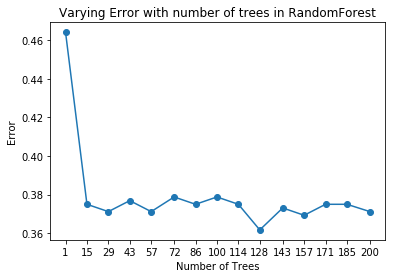

In [88]:
#plt.Figure(figsize=(12,14))
plt.plot(num_trees,error,'o-')
plt.xticks(num_trees)
plt.title('Varying Error with number of trees in RandomForest')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.show()

<b>Analysis:</b> From above graph, the error is minimum for number of tree estimators = 128. The RandomSearchCV suggested best n_estimators =168, however we got better results, which is good as the complexity of model will also reduce. It might also be a good choice to go for n_estimators between 15-29 since the change in error is less than 2% but the complexity of model changes drastically.

For Redwine dataset, it makes sense to use ensemble of trees instead of a single DecisionTree model as we have a significant decrease in error rate i.e. from 0.47 to 0.35. It is a 12% decrease in error.

**Repeat problem for banknote.data: https://archive.ics.uci.edu/ml/datasets/banknote+authentication**

In [89]:
bank = np.loadtxt('data_banknote_authentication.txt',delimiter=',')
print(bank.shape)

(1372, 5)


In [90]:
bank[:5]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699,  0.     ],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ,  0.     ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645,  0.     ],
       [ 3.4566 ,  9.5228 , -4.0112 , -3.5944 ,  0.     ],
       [ 0.32924, -4.4552 ,  4.5718 , -0.9888 ,  0.     ]])

In [91]:
features = bank[:,:-1]
target = bank[:,-1]
print(target.shape)
print(features.shape)

(1372,)
(1372, 4)


In [92]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(features,target,test_size=0.33)

In [93]:
print(random_grid)

{'n_estimators': array([  1,  11,  21,  32,  42,  53,  63,  74,  84,  95, 105, 116, 126,
       137, 147, 158, 168, 179, 189, 200]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': array([  5,  15,  26,  36,  47,  57,  68,  78,  89, 100]), 'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]), 'bootstrap': [True]}


In [94]:
#Use the random grid to search for best hyperparameters

#first initialize randomforest instance
rfc = RandomForestClassifier(random_state=10)

#search with 50 different combinations
rf_random = model_selection.RandomizedSearchCV(estimator = rfc, \
                                               param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, \
                                               random_state=10, n_jobs = -1)

#fit random search
rf_random.fit(xtrain,ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   34.1s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': array([  1,  11,  21,  32,  42,  53,  63,  74,  84,  95, 105, 116, 126,
       137, 147, 158, 168, 179, 189, 200]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': array([  5,  15,  26,  36,  47,  57,  68,  78,  89, 100]), 'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]), 'bootstrap': [True]},
          pre_dispatch='2*n_jobs', random_state=10, refit=True,
 

In [95]:
bstparams = rf_random.best_params_
bstparams

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 57,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'n_estimators': 168}

In [96]:
#iterate over number of trees
error = []
for trees in num_trees:
    rfc = RandomForestClassifier(n_estimators=trees,criterion=bstparams['criterion'],max_depth=bstparams['max_depth'],\
                                 max_features=bstparams['max_features'],min_samples_leaf=bstparams['min_samples_leaf'],random_state=10)
    
    accuracy,_,_ = fit_and_evaluate(xtrain,ytrain,xtest,ytest,rfc,None)
    error.append(1-accuracy)

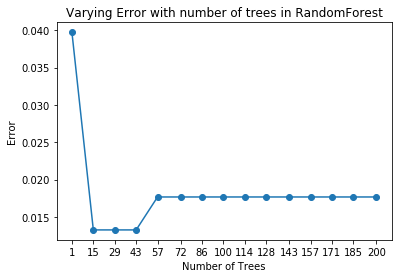

In [97]:
#plt.Figure(figsize=(12,14))
plt.plot(num_trees,error,'o-')
plt.xticks(num_trees)
plt.title('Varying Error with number of trees in RandomForest')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.show()

<b>Analysis:</b> From above graph, the error is minimum for number of trees = 15-43. The RandomSearchCV suggested best n_estimators =11. As we can see from the graph, the error rate did not changed much after using ensembles. The total change in error is between 4%, which is not a large change.

Since we are not gaining much knowledge from this ensemble of classifiers, it is a good idea to stick to single DecisionTree model instead of ensemble of trees.